### **1. 라이브러리 불러오기**

In [1]:
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 

### **2. 데이터 로드**
**다음과 같은 3가지 방법이 존재함**
#### 1) **local에서 csv file 불러오기**
   - read_csv( [파일 경로] )
#### 2) **local에서 excel file 불러오기**
   - read_excel( [파일 경로] )
#### 3) **url로 csv or excel file 불러오기**
   - read_csv( [url 주소] ) -> **raw 주소로 사용**

In [2]:
df = pd.read_csv("C:/Users/JunYoungPark/ai_study/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **3. 결측치(na) 확인 & 제거**
#### **결측치 확인**: isna()
#### **결측치 제거**: fillna()
- **결측치 제거는 다음과 같은 방법 존재**
  1) 특정 값으로 채우기 -> 0 또는 Unknown과 같은 값
  2) 각 col의 mean, median, mode
  3) 이전 값 또는 다음 값 -> df.fillna(method='ffill / bfill')
  5) 결측치가 포함된 row/col 제거 -> dropna()

In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

### **4. 불필요한 column 제거**

In [5]:
df = df.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'])

### **5. encoding (숫자)**
#### **라벨 인코딩 (문자 -> 숫자)**
data['col'] = le.fit_transform(data['col'])

In [6]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [7]:
df['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

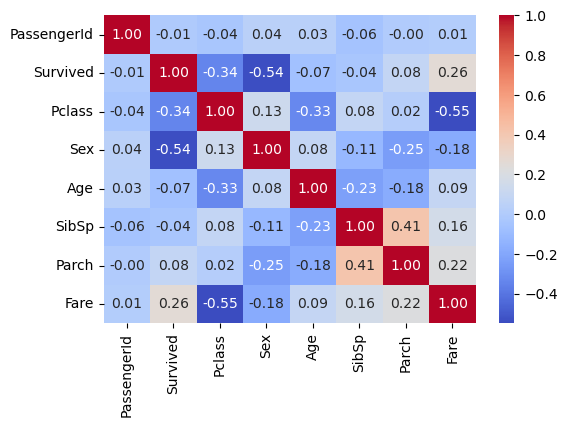

In [8]:
# corr 확인
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### **6. Input과 Output(label) 설정**
#### **X를 뽑아낼 때 2가지 방법**
**1) drop() 사용 (권장)**
**2) loc 사용 -> df.loc[:, df.columns != 'Survived']**

In [9]:
X = df.drop(columns=['Survived']) # 모든 행과 'Survived' 컬럼 제외한 것
y = df.iloc[:, 1]   # 'Survived' 컬럼 (타겟 레이블)

In [10]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.2500
1,2,1,0,38.0,1,0,71.2833
2,3,3,0,26.0,0,0,7.9250
3,4,1,0,35.0,1,0,53.1000
4,5,3,1,35.0,0,0,8.0500


In [11]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### **7. 데이터셋 나누기**
- **train_test_split(X, y, test_size, random_state)**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# normalization (accuracy 향상을 위해 정규화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **8. 모델 생성**
- **Decision Tree, Random Forest, SVM, Logistic Regression, KNN**

In [14]:
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel="linear", random_state=42)
lr_model = LogisticRegression(max_iter=500, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

### **9.모델 학습**
- **model.fit(X_train, y_train)**

In [15]:
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

### **10. 예측값 생성**
- **y_pred = model.predict(X_test)**

In [17]:
dt_y_pred = dt_model.predict(X_test)
rf_y_pred = rf_model.predict(X_test)
svm_y_pred = svm_model.predict(X_test)
lr_y_pred = lr_model.predict(X_test)
knn_y_pred = knn_model.predict(X_test)

### **11. 정확도 평가**
- **accuracy_score(y_test, y_pred)**
- **classification_report(y_test, y_pred)**

In [19]:
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_y_pred))
print("RandomForest Accuracy:", accuracy_score(y_test, rf_y_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_y_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_y_pred))
print("KNeighbors Accuracy:", accuracy_score(y_test, knn_y_pred))

Decision Tree Accuracy: 0.7374301675977654
RandomForest Accuracy: 0.8212290502793296
SVM Accuracy: 0.7821229050279329
Logistic Regression Accuracy: 0.8100558659217877
KNeighbors Accuracy: 0.7932960893854749


In [20]:
print(classification_report(y_test, dt_y_pred))
print(classification_report(y_test, rf_y_pred))
print(classification_report(y_test, svm_y_pred))
print(classification_report(y_test, lr_y_pred))
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       105
           1       0.70      0.65      0.67        74

    accuracy                           0.74       179
   macro avg       0.73      0.72      0.73       179
weighted avg       0.74      0.74      0.74       179

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

              preci